In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import mysql.connector
db = mysql.connector.connect(
    host='localhost',
    user='root',
    password='4542',
    database='ecommerce'
)
cur= db.cursor()



In [2]:
query = """select distinct(customer_city) from customers """
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ['City'])
df

,City
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas
...,...
4114,siriji
4115,natividade da serra
4116,monte bonito
4117,sao rafael


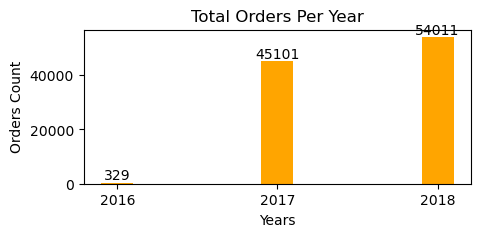

In [3]:
query = """select count(order_id) as orders_placed, year(order_purchase_timestamp) as year from orders group by year order by orders_placed """
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns=['Orders Placed','Order Year'])
plt.figure(figsize = (5,2))
bars = plt.bar(df['Order Year'],df['Orders Placed'],color = 'orange',width = 0.2)
plt.xlabel('Years')
plt.ylabel("Orders Count")
plt.title("Total Orders Per Year")
plt.xticks(df['Order Year'])
plt.bar_label(bars)
plt.show()

In [4]:
query = """select upper(p.product_category),round(sum(pm.payment_value),2) from products p join order_items on p.product_id = order_items.product_id join 
payments pm on order_items.order_id = pm.order_id group by p.product_category"""
cur.execute(query)
data = cur.fetchall()
plt.figure(figsize = (12,3))
df = pd.DataFrame(data,columns = ['Category','Total Sum'])
df = df.sort_values(by = 'Total Sum', ascending = False).reset_index(drop=True)
df

,Category,Total Sum
0,BED TABLE BATH,1712553.67
1,HEALTH BEAUTY,1657373.12
2,COMPUTER ACCESSORIES,1585330.45
3,FURNITURE DECORATION,1430176.39
4,WATCHES PRESENT,1429216.68
...,...,...
69,PC GAMER,2174.43
70,HOUSE COMFORT 2,1710.54
71,CDS MUSIC DVDS,1199.43
72,FASHION CHILDREN'S CLOTHING,785.67


<Figure size 1200x300 with 0 Axes>

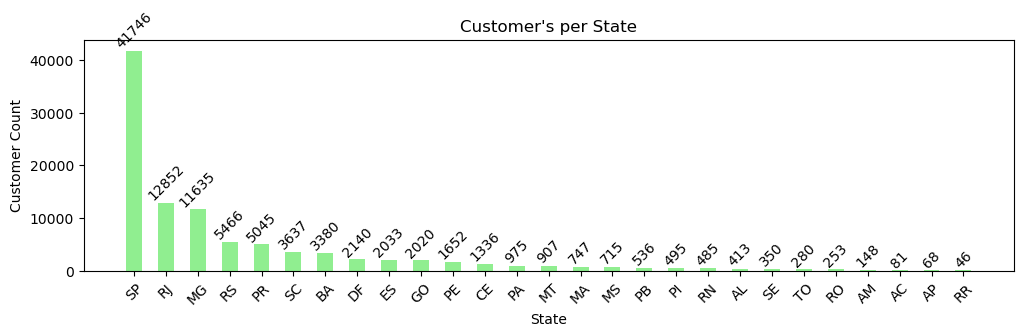

In [5]:
query = """select distinct count(customer_id) as Customer_Count, customer_state from customers group by customer_state order by Customer_Count desc """
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns =['Customer_Count','customer_state'])
plt.figure(figsize = (12,3))
bars = plt.bar(df['customer_state'],df ['Customer_Count'],color = 'lightgreen',width = 0.5)
plt.bar_label(bars,rotation = 45)
plt.xticks(rotation = 45)
plt.xlabel("State")
plt.ylabel("Customer Count")
plt.title("Customer's per State")
plt.show()

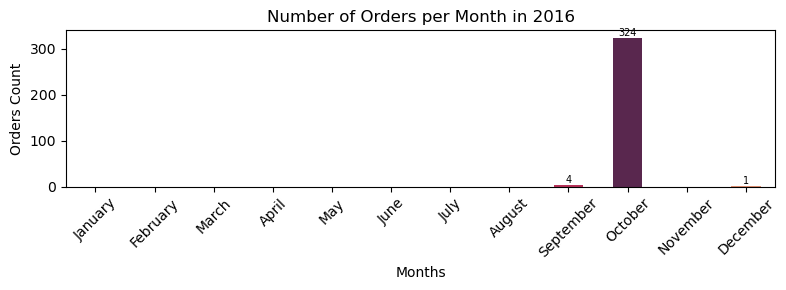

-------------------------------------------------------------------------------------------------------------------------------------------


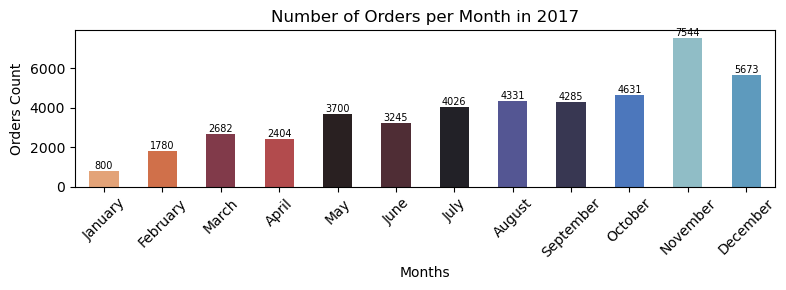

-------------------------------------------------------------------------------------------------------------------------------------------


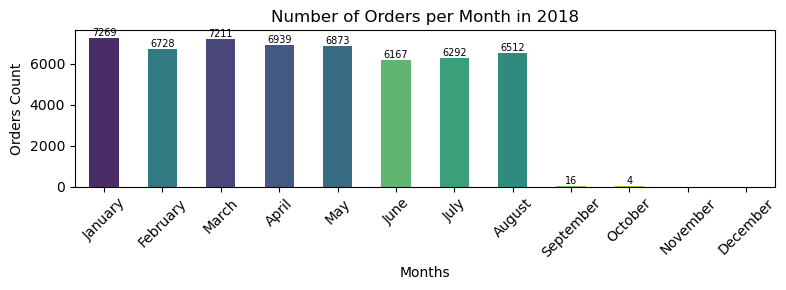

In [6]:
query = """select monthname(order_purchase_timestamp) as Months, count(order_id) as Orders_Count from orders 
where year(order_purchase_timestamp) = 2016 group by Months
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=['Months','Orders_count'])
df = df.sort_values(by='Orders_count', ascending=False).reset_index(drop=True)
O = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.figure(figsize=(8,3))
ax = sns.barplot(data=df, x='Months', y='Orders_count', palette='rocket', order=O, width = 0.5, hue = 'Months',legend = False)
for c in ax.containers:
    ax.bar_label(c, fontsize=7)
plt.title('Number of Orders per Month in 2016')
plt.xlabel('Months')
plt.ylabel('Orders Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("-------------------------------------------------------------------------------------------------------------------------------------------")

query = """select monthname(order_purchase_timestamp) as Months, count(order_id) as Orders_Count from orders 
where year(order_purchase_timestamp) = 2017 group by Months
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=['Months','Orders_count'])
df = df.sort_values(by='Orders_count', ascending=False).reset_index(drop=True)
O = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.figure(figsize=(8,3))
ax = sns.barplot(data=df, x='Months', y='Orders_count', palette='icefire', order=O, width = 0.5, hue = 'Months',legend = False)
for c in ax.containers:
    ax.bar_label(c, fontsize=7)
plt.title('Number of Orders per Month in 2017')
plt.xlabel('Months')
plt.ylabel('Orders Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("-------------------------------------------------------------------------------------------------------------------------------------------")

query = """select monthname(order_purchase_timestamp) as Months, count(order_id) as Orders_Count from orders 
where year(order_purchase_timestamp) = 2018 group by Months
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=['Months','Orders_count'])
df = df.sort_values(by='Orders_count', ascending=False).reset_index(drop=True)
O = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.figure(figsize=(8,3))
ax = sns.barplot(data=df, x='Months', y='Orders_count', palette='viridis', order=O, width = 0.5,hue = 'Months',legend = False)
for c in ax.containers:
    ax.bar_label(c, fontsize=7)
plt.title('Number of Orders per Month in 2018')
plt.xlabel('Months')
plt.ylabel('Orders Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
query = """select c.customer_state as 'Customer State', upper(p.product_category) as 'Product Category', count(o.order_id) as 'Number of Orders',
round(sum(pm.payment_value),2) as "Total Sum" from customers c 
join orders o on c.customer_id = o.customer_id
join order_items oi on o.order_id = oi.order_id join products p on oi.product_id = p.product_id join payments pm on o.order_id = pm.order_id group by 
p.product_category,c.customer_state
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ['Customer State','Product Category','Number of Orders','Total Sum'])
highest_per_state = (
    df.sort_values(['Customer State', 'Number of Orders'], ascending=[True, False]).groupby('Customer State').head(1)
    .sort_values('Number of Orders', ascending=False).reset_index(drop=True))
highest_per_state



,Customer State,Product Category,Number of Orders,Total Sum
0,SP,BED TABLE BATH,5572,765517.23
1,RJ,BED TABLE BATH,1788,247744.47
2,MG,BED TABLE BATH,1403,218010.61
3,RS,BED TABLE BATH,665,93708.68
4,PR,FURNITURE DECORATION,530,114433.72
5,BA,HEALTH BEAUTY,394,67016.14
6,SC,SPORT LEISURE,376,63773.11
7,DF,HEALTH BEAUTY,252,38685.02
8,GO,BED TABLE BATH,246,41296.24
9,PE,HEALTH BEAUTY,240,57239.84


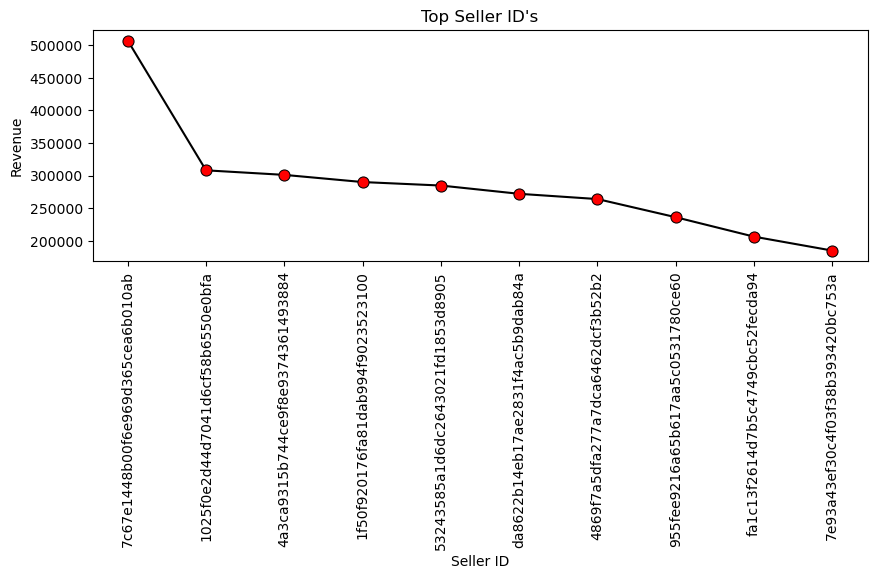

In [47]:
query = """select * , dense_rank () over(order by Revenue desc) as "Rank" from (select oi.seller_id, round(sum(p.payment_value),2) as Revenue 
from order_items oi join payments p on oi.order_id = p.order_id group by oi.seller_id) as a """

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ['seller_id','Revenue',"Rank"])
df = df.sort_values(by ='Revenue', ascending = False).head(10)
plt.figure(figsize =(10,3))
ax = sns.lineplot(x='seller_id', y='Revenue', data=df,color ='black',marker ='o',markersize = 8,markerfacecolor = 'red',markeredgecolor = 'black')
plt.xticks(rotation = 90)
plt.xlabel('Seller ID')
plt.ylabel("Revenue")
plt.title("Top Seller ID's")
plt.show()

In [50]:
query = """select Years, Months, payments, round(sum(Payments) over(order by Years, Months),2) as "Cumulative Payments" from 
(select year(o.order_purchase_timestamp)as Years,month(o.order_purchase_timestamp) as Months, round(sum(p.payment_value),2) as Payments from orders o 
join payments p on o.order_id = p.order_id group by Years, Months order by Years, Months) as a  """
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ['Year','Month','Payments','Cumulative Payments'])
df

,Year,Month,Payments,Cumulative Payments
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39
5,2017,3,449863.60,939621.99
6,2017,4,417788.03,1357410.02
7,2017,5,592918.82,1950328.84
8,2017,6,511276.38,2461605.22
9,2017,7,592382.92,3053988.14


In [60]:
query = """ with a as (select year(o.order_purchase_timestamp)as Years,round(sum(p.payment_value),2) as Payments from orders o 
join payments p on o.order_id = p.order_id group by Years order by Years) 
select Years,Payments, lag(Payments,1)over(order by payments) as "Previous Year Sales", 
Round(
((Payments-lag(Payments,1)over(order by Years))/
lag(Payments,1)over(order by Years))* 100,2) as "Growth Percentage"
from a"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ['Years','Sales','Previous Year Sales','Growth Percentage'])
df 

,Years,Sales,Previous Year Sales,Growth Percentage
0,2016,59362.34,NaN,NaN
1,2017,7249746.73,59362.34,12112.7
2,2018,8699763.05,7249746.73,20.0


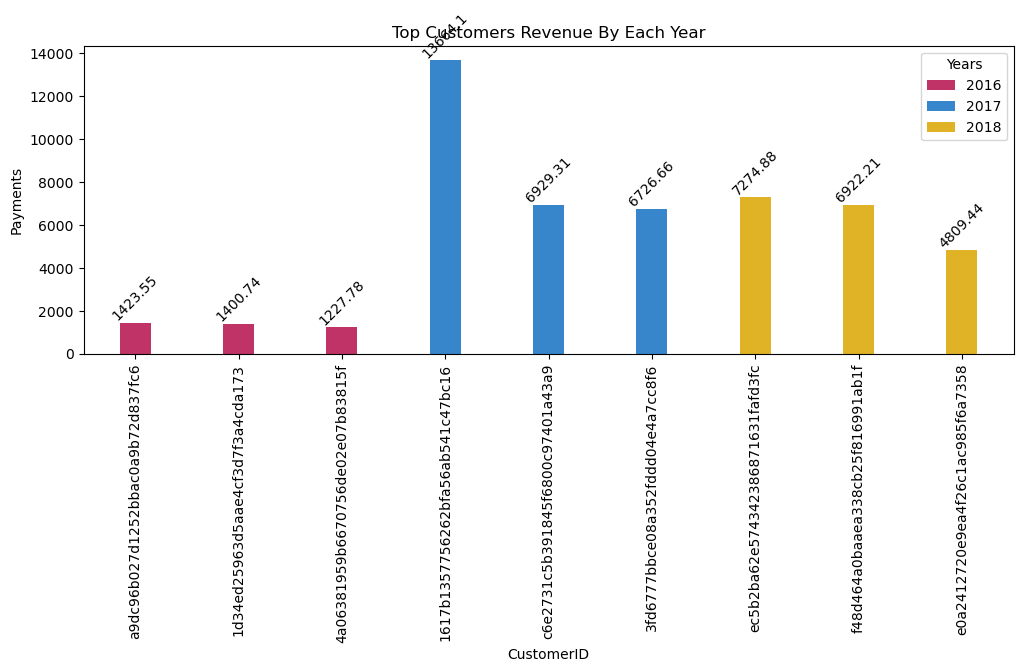

In [91]:
query = """select Years, CustomerID, Payments, D_Rank from(select year(o.order_purchase_timestamp) as Years, o.customer_id as CustomerID, 
round(sum(p.payment_value),2) as Payments, 
dense_rank() over(partition by year(o.order_purchase_timestamp) order by sum(p.payment_value) desc) as D_Rank
from orders o join payments p on o.order_id = p.order_id group by Years, CustomerID) as a where D_Rank<=3 ;
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns=['Years','CustomerID','Payments','D_Rank'])
plt.figure(figsize=(12,4))
palette = ['#D81B60', '#1E88E5', '#FFC107']
ax = sns.barplot(x = 'CustomerID',y= 'Payments',data = df, hue='Years',width = 0.3,palette = palette)
for container in ax.containers:
    ax.bar_label(container,rotation = 45)
plt.xticks(rotation = 90)
plt.title('Top Customers Revenue By Each Year')
plt.show()
